In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [187]:
DIR="../robot-data/new_data"

# SCENARIO="build" 
# SCENARIO="cans"
SCENARIO="pick"
# FAILURE="laser_fault" 
# FAILURE="obs"
# FAILURE="miss_cup"
# FAILURE="restricted_vision"
FAILURE="stolen"
# FAILURE="stuck"
INF=0
SUP=100

In [188]:
runs = []
for x in range(100):
    try:
        runs.append(np.genfromtxt(f"{DIR}/normal/{SCENARIO}/counts_only/{x+1}.csv", 
                                  delimiter=",", skip_header=1))
    except:
        pass
all_runs = np.concatenate([np.reshape(r, -1) for r in runs])

(0.0, 100.0)

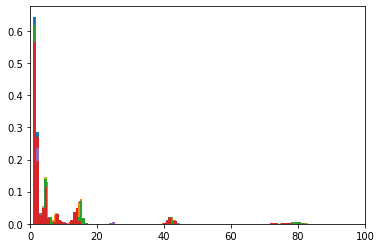

In [189]:
for i, r in enumerate(runs):
    plt.hist(np.reshape(r[np.logical_and(r>INF, r<SUP)], -1), bins=100, density=True)
plt.xlim((INF,SUP))

In [190]:
faults = []
for x in range(100):
    try:
        faults.append(np.genfromtxt(f"{DIR}/test/{SCENARIO}/{FAILURE}/counts_only/{x+1}.csv", 
                                  delimiter=",", skip_header=1))
    except:
        pass
# all_faults = np.concatenate([np.reshape(r, -1) for r in faults])

(0.0, 100.0)

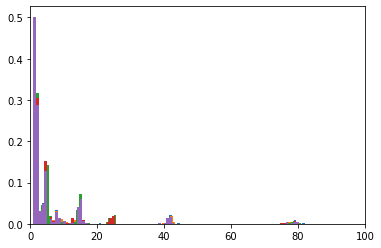

In [191]:
for i, f in enumerate(faults):
    plt.hist(np.reshape(f[np.logical_and(f>INF, f<SUP)], -1), bins=100, density=True)
plt.xlim((INF, SUP))

In [ ]:
for i, r in enumerate(faults):
    f = faults[i]
    plt.hist(np.reshape(f[np.logical_and(f>INF, f<SUP)], -1), bins='auto', color='red', density=True)
    
for i, r in enumerate(runs):
    r = runs[i]
    plt.hist(np.reshape(r[np.logical_and(r>INF, r<SUP)], -1), bins='auto',  alpha=2/len(runs), density=True)


In [193]:
n = 2
ks_runs_runs = []
for j, rj in enumerate(runs):
    other_runs = np.concatenate([np.reshape(runs[i], -1) for i in range(len(runs)) if i != j])
    ks_runs_runs.append(ks_2samp(np.reshape(other_runs, -1), np.reshape(rj, -1)).statistic)
ks_runs_faults = []
for j, fj in enumerate(faults):
    fj = fj[len(fj)*(n-2)//3:]
    ks_runs_faults.append(ks_2samp(np.reshape(all_runs, -1), np.reshape(fj, -1)).statistic)

(array([ 409.29925293,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
        1227.8977588 ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         409.29925293]),
 array([0.07159612, 0.07208476, 0.0725734 , 0.07306204, 0.07355068,
        0.07403932, 0.07452796, 0.0750166 , 0.07550524, 0.07599388,
        0.07648252, 0.07697116, 0.0774598 , 0.07794844, 0.07843708,
        0.07892572, 0.07941436, 0.079903  , 0.08039164, 0.08088028,
        0.08136892, 0.08185756, 0.0823462 , 0.08283484, 0.08332348,
        0.08381212, 0.08430076, 0.0847894 , 0.08527804, 0.08576668]),
 <BarContainer object of 29 artists>)

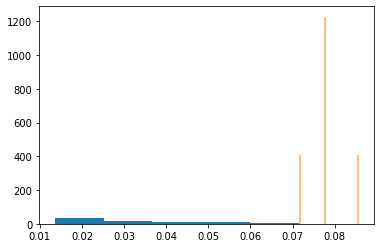

In [194]:
plt.hist(ks_runs_runs, bins="auto", density=True)
plt.hist(ks_runs_faults, bins="auto", density=True, alpha=0.5)

In [195]:
ks_faults_faults = []
for j, rj in enumerate(faults):
    other_faults = np.concatenate([np.reshape(faults[i], -1) for i in range(len(faults)) if i != j])
    ks_faults_faults.append(ks_2samp(np.reshape(other_faults, -1), np.reshape(rj, -1)).statistic)


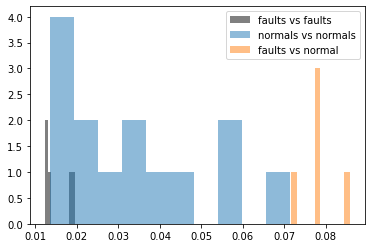

In [196]:
plt.hist(ks_faults_faults, label="faults vs faults", color="gray")
plt.hist(ks_runs_runs, label="normals vs normals", alpha=0.5)
plt.hist(ks_runs_faults, label="faults vs normal", alpha=0.5)
plt.legend()
_=_

In [197]:
len(ks_runs_runs)

14

In [198]:
len([ks for ks in ks_runs_faults if ks < 0.057])

0

In [199]:
sorted(ks_runs_runs)

[0.013509069434416654,
 0.013604763056672686,
 0.013605551801814775,
 0.018044433396883663,
 0.021561272210903315,
 0.02234009869404696,
 0.025175316860795105,
 0.03147011418766732,
 0.03418180851166697,
 0.0407414304724234,
 0.04729817688924398,
 0.055327406834798865,
 0.05723755163078226,
 0.07147529396645891]